In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
print(df.shape)

(568454, 10)


In [4]:
df = df.head(1000)#Changing our dataset, i.e including only 1000 rows.
print(df.shape)

(1000, 10)


In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<h1><b>Exploratory Data Analysis</b></h1>

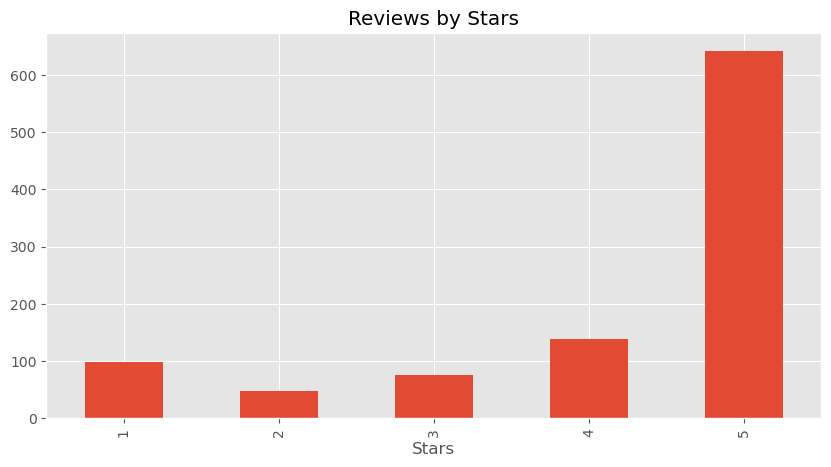

In [6]:
graph = df["Score"].value_counts().sort_index().plot(
    kind="bar", 
    title="Reviews by Stars", 
    figsize=(10, 5))
graph.set_xlabel("Stars")
plt.show()

<h1><b>Using NLTK</b></h1>

<p>Taking a random review

In [7]:
example = df['Text'][845]
print(example)

This is certainly the best caramels I have ever had.  I just wish it came in bigger pieces.  I finished the whole box in one sitting!  I will certainly buy them again.


<p>1) Tokenizing the review and displaying first 10 Tokens

In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'is',
 'certainly',
 'the',
 'best',
 'caramels',
 'I',
 'have',
 'ever',
 'had']

<p>2) Tagging the Token with their respective parts of speech.

In [9]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('certainly', 'RB'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('caramels', 'NNS'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('ever', 'RB'),
 ('had', 'VBN')]

<p>3) Chunking

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  is/VBZ
  certainly/RB
  the/DT
  best/JJS
  caramels/NNS
  I/PRP
  have/VBP
  ever/RB
  had/VBN
  ./.
  I/PRP
  just/RB
  wish/VB
  it/PRP
  came/VBD
  in/IN
  bigger/JJR
  pieces/NNS
  ./.
  I/PRP
  finished/VBD
  the/DT
  whole/JJ
  box/NN
  in/IN
  one/CD
  sitting/VBG
  !/.
  I/PRP
  will/MD
  certainly/RB
  buy/VB
  them/PRP
  again/RB
  ./.)


<h1><b>Using VADER </h1><p>(Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

SentiIntAnaly = SentimentIntensityAnalyzer()#Our object

In [12]:
SentiIntAnaly.polarity_scores("Bad")#Passing a random sentence to see results of VADER approach.

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}

In [13]:
SentiIntAnaly.polarity_scores(example)

{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.8999}

<h3><b>Giving polarity scores to all reviews in our Database.

In [14]:
my_results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["Text"]
    myid = row["Id"]
    my_results[myid] = SentiIntAnaly.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
#This dictionary has 1000 elements in it. 
#All 1000 rows from our dataset
#Giving polarity score to all the reviews in the Text column.
my_results

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [16]:
#Converting results dictionary to Pandas Dataframe.
vader_result = pd.DataFrame(my_results).T
#.T changes rows to columns and columns to rows.

In [17]:
vader_result = vader_result.reset_index().rename(columns={"index": "Id"})#resetting the index
vader_result = vader_result.merge(df, how="left")#merging result on left side of Dataframe.

In [18]:
vader_result.head(3)#polarity/sentiment score from Vader attached to df.

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


<h1><b>Plotting results from VADER</b></h1>
<p>(Checking results)

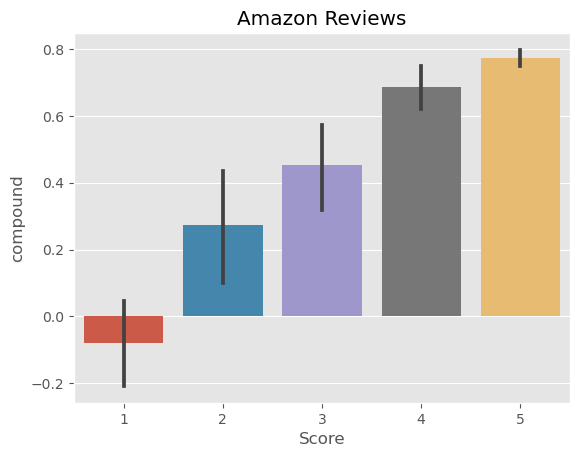

In [19]:
ax = sns.barplot(data=vader_result, x="Score", y='compound')
ax.set_title('Amazon Reviews')
plt.show()

<h1><b>Plotting Each Sentiment against Score.</b></h1>

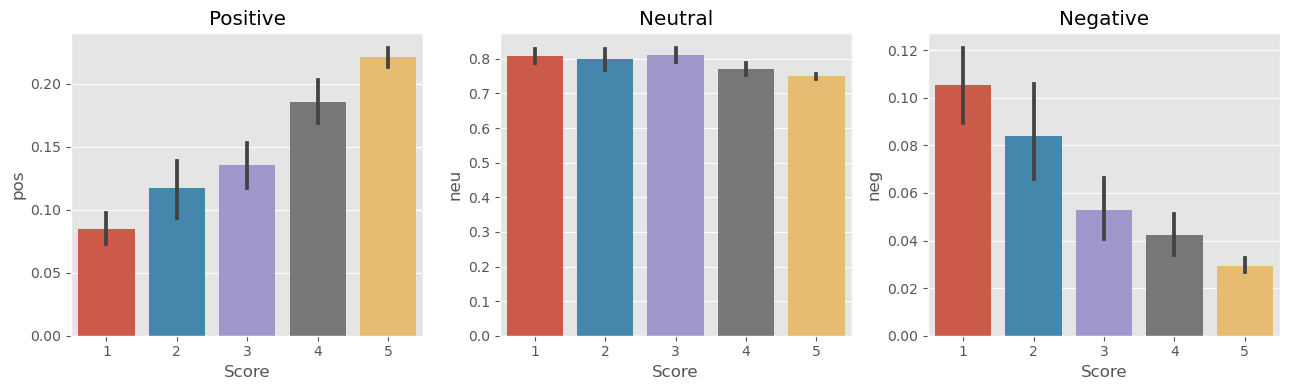

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4))
sns.barplot(data=vader_result, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vader_result, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vader_result, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

<h1><b>Using Roberta Pretrained Model

In [21]:
#AutoTokenizer is similar to what nltk can do.
from transformers import AutoTokenizer#transformer is hugging face's library

#The softmax function in scipy.special is a function that takes a vector of numbers and returns a vector of probabilities that sum to 1.
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax#we will apply softmax to output

In [22]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"#pretrained model.
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<h1><b>Using NLTK model on one Example</b></h1>

In [23]:
print(example)
SentiIntAnaly.polarity_scores(example)

This is certainly the best caramels I have ever had.  I just wish it came in bigger pieces.  I finished the whole box in one sitting!  I will certainly buy them again.


{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.8999}

<h3><b>⬆    Comparison Between Two models    ⬇</b></h3>

<h1><b>Using ROBERTA model on one Example</b></h1>

In [24]:
encoded_text = tokenizer(example, return_tensors='pt')#encoding text, encoding in 1s and 0s, that the model will understand.
output = model(**encoded_text)#take encoded text and run our model on it.
scores = output[0][0].detach().numpy()#making numpy array so that we can store it locally.
scores = softmax(scores)#apply softmax to scores.
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0054259887, 'roberta_neu': 0.009629143, 'roberta_pos': 0.9849449}


<h1><b>Applying ROBERTA model on entire Dataset of 1000 rows</b></h1>

In [28]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [29]:
my_results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:#one of the text is too long for the model to handel, hence we skip it.
        text = row["Text"]
        myid = row["Id"]
        results_from_vader = SentiIntAnaly.polarity_scores(text)
        vader_result_rename = {}
        for key, value in results_from_vader.items():
            vader_result_rename[f"vader_{key}"] = value
        results_from_roberta = polarity_scores_roberta(text)
        results_of_both_models = {**vader_result_rename, **results_from_roberta}
        my_results[myid] = results_of_both_models
    except RuntimeError:
        print(f"Broke for id {myid}")
        
        

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


<p>Combining results of two models

In [30]:
results_df = pd.DataFrame(my_results).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [31]:
results_df.head(2)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950607,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


<h1>Comparing Two Models</h1>

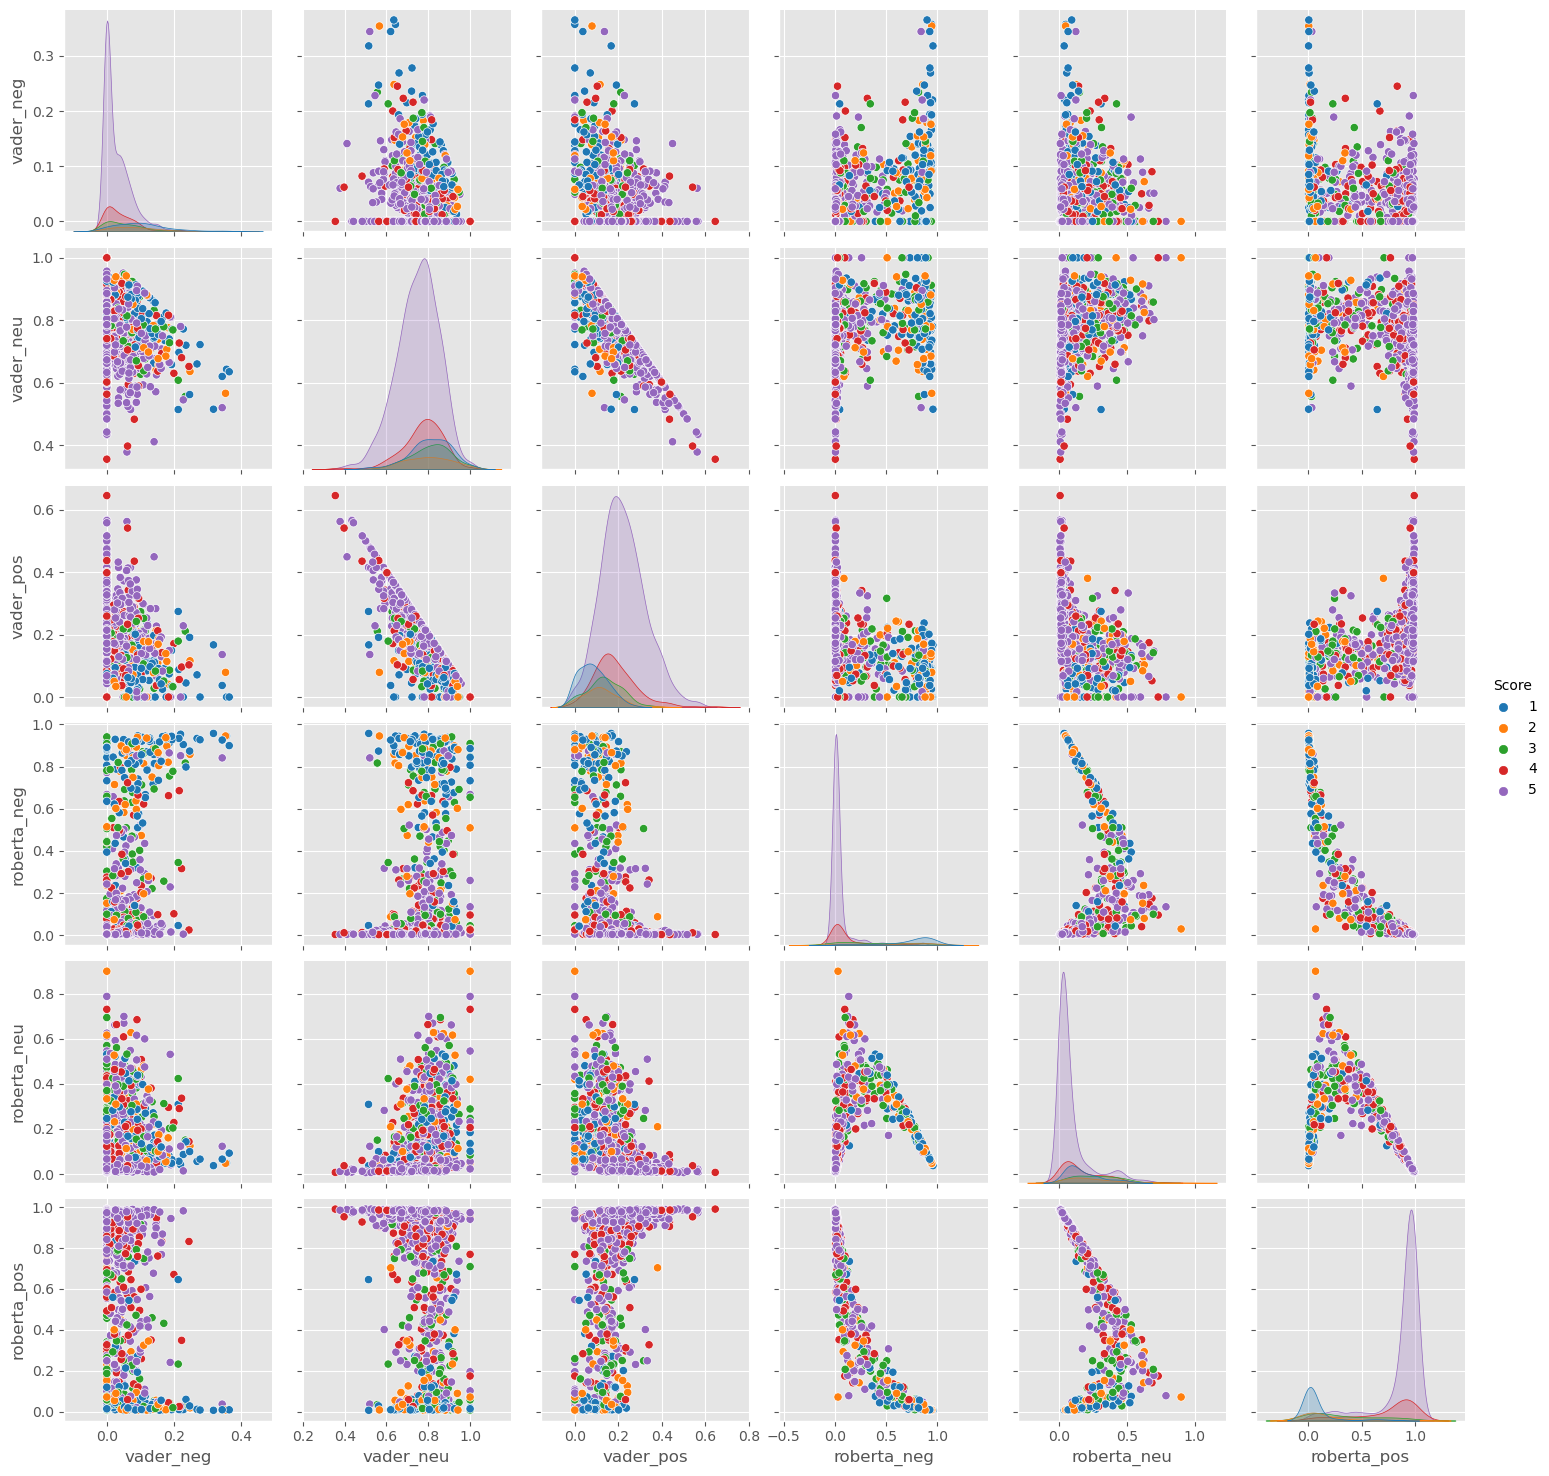

In [32]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

<h1>Review</h1>

<h3>Positive Sentiment

<p>Using predictions of Roberta model.</p>

<p>Extracting Text where Roberta model predicted a Text as positive while dataset had rating of 1.</p>

In [33]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'If it were possible to give this product zero stars, I would have done so.  I am a huge fan of Twinings teas, and was very excited to try this new blend.  After arriving home from the grocery, I immediately started the kettle to enjoy a cup while prepping dinner.  Between sorting, washing, and chopping items, the hot water was added to the bag to steep.  Preparation continued, until a distinctly off odor hit me.  I thought one of my ingredients must be rancid!  I hunted around for almost four minutes before I realized it was the tea.  Even after cleaning up, and airing out the kitchen, my roommate later came in and asked about the smell.  Save your money to purchase ANY other Twinings product.'

<p>Using predictions of Vader model.</p>

<p>Extracting Text where Vader model predicted a Text as positive while dataset had rating of 1.</p>

In [34]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

<h3>Negative Sentiment

<p>Using predictions of Roberta model.

<p>Extracting Text where Roberta model predicted Text as negative while dataset had rating of 5.

In [38]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

"This bags are very difficult to open with the aid of some tool, such as scissors, don't even try without scissors.<br /><br />They are crispy and taste like chips that aren't advertised as being salted. They definitely aren't healthy, because I can feel the grease all over my fingers when eating them, and I can see the grease at the bottom of the bag, too.<br /><br />They are high-quality chips, and deserve to be put on your table."

<p>Using predictions of Vader model.

<p>Extracting Text where Vader model predicted Text as negative while dataset had rating of 5.

In [39]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

<h1>Using Huggingface Pipeline

In [40]:
from transformers import pipeline

In [41]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [42]:
sent_pipeline('I like Ice-cream!!')

[{'label': 'POSITIVE', 'score': 0.9993903636932373}]